In [25]:
# %pip install numpy
# %pip install pandas

import numpy as np
import pandas as pd

# Завдання 1
**Автор:** Санжаров Данііл Русланович ФІТ 4-7

Обробка та нааліз даних про ВВП країн. Датасет було отримано з Вікіпедії з використанням бібілотеки Pandas.

In [26]:
# GDP dataset from Wikipedia
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'

tables = pd.read_html(url)
df = tables[2] # GDP by country

df.head()

Country/Territory IMF[1][13]            World Bank[14]             \
  Country/Territory   Forecast       Year       Estimate       Year   
0             World  109529216       2024      105435540       2023   
1     United States   28781083       2024       27360935       2023   
2             China   18532633  [n 1]2024       17794782  [n 3]2023   
3           Germany    4591100       2024        4456081       2023   
4             Japan    4110452       2024        4212945       2023   

  United Nations[15]             
            Estimate       Year  
0          100834796       2022  
1           25744100       2022  
2           17963170  [n 1]2022  
3            4076923       2022  
4            4232173       2022

In [27]:
# Clean up headers
df.columns = ['Coutry', 'IMF_Forecast', 'IMF_Year', 'WB_Estimate', 'WB_Year', 'UN_Estimate', 'UN_Year']
df.drop(columns=['IMF_Year', 'WB_Year', 'UN_Year'], inplace=True)

df = df.drop(0) # Drop first data row (World)
df.head()

,Coutry,IMF_Forecast,WB_Estimate,UN_Estimate
1,United States,28781083,27360935,25744100
2,China,18532633,17794782,17963170
3,Germany,4591100,4456081,4076923
4,Japan,4110452,4212945,4232173
5,India,3937011,3549919,3465541


In [28]:
# Replace dash, en and em dashes with NaN. Unicode for en dash is \u2013 and for em dash is \u2014
df.replace(['-', '\u2013', '\u2014'], np.nan, inplace=True)

df.isnull().sum()

Coutry           0
IMF_Forecast    15
WB_Estimate      8
UN_Estimate      1
dtype: int64

In [29]:
# Convert columns to float type
df['IMF_Forecast'] = pd.to_numeric(df['IMF_Forecast'], errors='coerce')
df['WB_Estimate'] = pd.to_numeric(df['WB_Estimate'], errors='coerce')
df['UN_Estimate'] = pd.to_numeric(df['UN_Estimate'], errors='coerce')

print(f'Types:\n{df.dtypes}')
df.head(10)

Types:
Coutry           object
IMF_Forecast    float64
WB_Estimate     float64
UN_Estimate     float64
dtype: object


,Coutry,IMF_Forecast,WB_Estimate,UN_Estimate
1,United States,28781083.000,27360935.000,25744100.000
2,China,18532633.000,17794782.000,17963170.000
3,Germany,4591100.000,4456081.000,4076923.000
4,Japan,4110452.000,4212945.000,4232173.000
5,India,3937011.000,3549919.000,3465541.000
6,United Kingdom,3495261.000,3340032.000,3089072.000
7,France,3130014.000,3030904.000,2775316.000
8,Brazil,2331391.000,2173666.000,1920095.000
9,Italy,2328028.000,2254851.000,2046952.000
10,Canada,2242182.000,2140086.000,2137939.000


In [30]:
# Replace NaN with mean of the row. Ignore first column (Country)
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: x.fillna(x.mean()), axis=1)

print(df.isnull().sum())
df.head(10)

Coutry          0
IMF_Forecast    0
WB_Estimate     0
UN_Estimate     0
dtype: int64


,Coutry,IMF_Forecast,WB_Estimate,UN_Estimate
1,United States,28781083.000,27360935.000,25744100.000
2,China,18532633.000,17794782.000,17963170.000
3,Germany,4591100.000,4456081.000,4076923.000
4,Japan,4110452.000,4212945.000,4232173.000
5,India,3937011.000,3549919.000,3465541.000
6,United Kingdom,3495261.000,3340032.000,3089072.000
7,France,3130014.000,3030904.000,2775316.000
8,Brazil,2331391.000,2173666.000,1920095.000
9,Italy,2328028.000,2254851.000,2046952.000
10,Canada,2242182.000,2140086.000,2137939.000


In [31]:
# Check for duplicates and drop them
print('Dublicates: ', df.duplicated().sum())
df.drop_duplicates(inplace=True)
print('Dublicates: ', df.duplicated().sum())

Dublicates:  0
Dublicates:  0


In [32]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe()

,IMF_Forecast,WB_Estimate,UN_Estimate
count,209.000,209.000,209.000
mean,525052.684,503280.084,482648.622
std,2439459.706,2327549.353,2236854.225
min,66.000,62.000,59.000
25%,9623.000,8980.000,8772.000
50%,35450.000,34016.000,31717.000
75%,257625.000,250843.000,237101.000
max,28781083.000,27360935.000,25744100.000


In [33]:
# Count difference between IMF_Forecast and WB_Estimate for each country
df['IMF_WB_Diff'] = abs(df['IMF_Forecast'] - df['WB_Estimate'])

# Find which country has the largest difference between IMF and WB
max_diff = df['IMF_WB_Diff'].max()
country = df[df['IMF_WB_Diff'] == max_diff]['Coutry'].values[0]
print(f'{country} has the largest difference between IMF and WB: {max_diff}')

df.head(10)

United States has the largest difference between IMF and WB: 1420148.0


,Coutry,IMF_Forecast,WB_Estimate,UN_Estimate,IMF_WB_Diff
1,United States,28781083.000,27360935.000,25744100.000,1420148.000
2,China,18532633.000,17794782.000,17963170.000,737851.000
3,Germany,4591100.000,4456081.000,4076923.000,135019.000
4,Japan,4110452.000,4212945.000,4232173.000,102493.000
5,India,3937011.000,3549919.000,3465541.000,387092.000
6,United Kingdom,3495261.000,3340032.000,3089072.000,155229.000
7,France,3130014.000,3030904.000,2775316.000,99110.000
8,Brazil,2331391.000,2173666.000,1920095.000,157725.000
9,Italy,2328028.000,2254851.000,2046952.000,73177.000
10,Canada,2242182.000,2140086.000,2137939.000,102096.000


In [34]:
# Calculate correlation between IMF and WB and UN
correlation_IMF_WB = df['IMF_Forecast'].corr(df['WB_Estimate'])
correlation_IMF_UN = df['IMF_Forecast'].corr(df['UN_Estimate'])
correlation_WB_UN = df['WB_Estimate'].corr(df['UN_Estimate'])

print(f'Correlation between IMF and WB: {correlation_IMF_WB}')
print(f'Correlation between IMF and UN: {correlation_IMF_UN}')
print(f'Correlation between  WB and UN: {correlation_WB_UN}')

# Find highest correlation
max_correlation = max(correlation_IMF_WB, correlation_IMF_UN, correlation_WB_UN)
if max_correlation == correlation_IMF_WB:
    print('IMF and WB have the highest correlation')
elif max_correlation == correlation_IMF_UN:
    print('IMF and UN have the highest correlation')
else:
    print('WB and UN have the highest correlation')

Correlation between IMF and WB: 0.9998989326121166
Correlation between IMF and UN: 0.9989654397213591
Correlation between  WB and UN: 0.9992851643326481
IMF and WB have the highest correlation


In [35]:
# Find mean of IMF, WB and UN
mean_IMF = df['IMF_Forecast'].mean()
mean_WB = df['WB_Estimate'].mean()
mean_UN = df['UN_Estimate'].mean()

print(f'Mean of IMF in 2024: {mean_IMF}')
print(f'Mean of  WB in 2023: {mean_WB}')
print(f'Mean of  UN in 2022: {mean_UN}')

print(f'Trend is {"up" if mean_IMF > mean_UN else "down"}.')

Mean of IMF in 2024: 525052.6842105263
Mean of  WB in 2023: 503280.0837320574
Mean of  UN in 2022: 482648.6220095694
Trend is up.


In [36]:
# Find standard deviation for each row
df['std'] = df.iloc[:, 1:].std(axis=1)

# Find country with the highest standard deviation
max_std = df['std'].max()
country = df[df['std'] == max_std]['Coutry'].values[0]
print(f'{country} has the highest standard deviation: {max_std}')

df.head(10)

United States has the highest standard deviation: 12996967.840786673


,Coutry,IMF_Forecast,WB_Estimate,UN_Estimate,IMF_WB_Diff,std
1,United States,28781083.000,27360935.000,25744100.000,1420148.000,12996967.841
2,China,18532633.000,17794782.000,17963170.000,737851.000,8685245.357
3,Germany,4591100.000,4456081.000,4076923.000,135019.000,2130985.897
4,Japan,4110452.000,4212945.000,4232173.000,102493.000,2042047.551
5,India,3937011.000,3549919.000,3465541.000,387092.000,1644726.208
6,United Kingdom,3495261.000,3340032.000,3089072.000,155229.000,1585304.522
7,France,3130014.000,3030904.000,2775316.000,99110.000,1447550.585
8,Brazil,2331391.000,2173666.000,1920095.000,157725.000,1006360.184
9,Italy,2328028.000,2254851.000,2046952.000,73177.000,1074997.008
10,Canada,2242182.000,2140086.000,2137939.000,102096.000,1036794.855


In [37]:
# Find max and min GDP for each year
max_IMF = df['IMF_Forecast'].max(); min_IMF = df['IMF_Forecast'].min()
max_WB = df['WB_Estimate'].max(); min_WB = df['WB_Estimate'].min()
max_UN = df['UN_Estimate'].max(); min_UN = df['UN_Estimate'].min()

print(f'Max IMF: {max_IMF}, Min IMF: {min_IMF}')
print(f'Max WB: {max_WB}, Min WB: {min_WB}')
print(f'Max UN: {max_UN}, Min UN: {min_UN}')

Max IMF: 28781083.0, Min IMF: 66.0
Max WB: 27360935.0, Min WB: 62.0
Max UN: 25744100.0, Min UN: 59.0


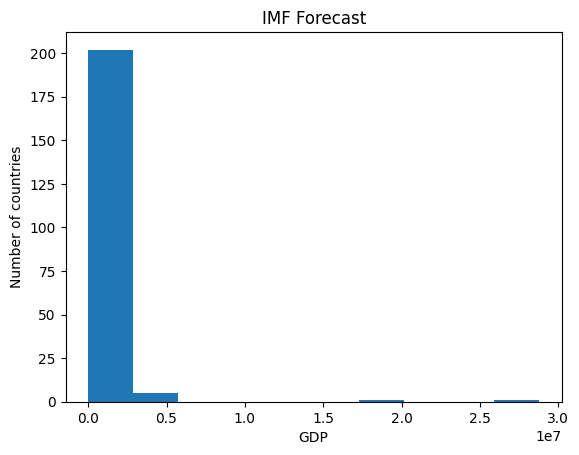

In [38]:
import matplotlib.pyplot as plt

# Build a histogram of IMF_Forecast
plt.hist(df['IMF_Forecast'], bins=10)
plt.title('IMF Forecast')
plt.xlabel('GDP')
plt.ylabel('Number of countries')
plt.show()

На гістограмі можна побачити, що більшість країн перебувають у нижчій частині між $0$ та $0.25 \times 10^7$. Є деякі країни з більшим ВВП в районі $0.5 \times 10^7$, але є одиничні випадки далі у верхній межі.

In [39]:
# Calculate share of world GDP for each country for each year
df['IMF_Share'] = df['IMF_Forecast'] / df['IMF_Forecast'].sum()
df['WB_Share'] = df['WB_Estimate'] / df['WB_Estimate'].sum()
df['UN_Share'] = df['UN_Estimate'] / df['UN_Estimate'].sum()

df.head(10)

,Coutry,IMF_Forecast,WB_Estimate,UN_Estimate,IMF_WB_Diff,std,IMF_Share,WB_Share,UN_Share
1,United States,28781083.000,27360935.000,25744100.000,1420148.000,12996967.841,0.262,0.260,0.255
2,China,18532633.000,17794782.000,17963170.000,737851.000,8685245.357,0.169,0.169,0.178
3,Germany,4591100.000,4456081.000,4076923.000,135019.000,2130985.897,0.042,0.042,0.040
4,Japan,4110452.000,4212945.000,4232173.000,102493.000,2042047.551,0.037,0.040,0.042
5,India,3937011.000,3549919.000,3465541.000,387092.000,1644726.208,0.036,0.034,0.034
6,United Kingdom,3495261.000,3340032.000,3089072.000,155229.000,1585304.522,0.032,0.032,0.031
7,France,3130014.000,3030904.000,2775316.000,99110.000,1447550.585,0.029,0.029,0.028
8,Brazil,2331391.000,2173666.000,1920095.000,157725.000,1006360.184,0.021,0.021,0.019
9,Italy,2328028.000,2254851.000,2046952.000,73177.000,1074997.008,0.021,0.021,0.020
10,Canada,2242182.000,2140086.000,2137939.000,102096.000,1036794.855,0.020,0.020,0.021


In [40]:
# Find top 10 countries with the most significant change in share of world GDP between IMF and UN
df['IMF_UN_Diff'] = abs(df['IMF_Share'] - df['UN_Share'])
df_top10 = df.nlargest(10, 'IMF_UN_Diff')
df_top10


,Coutry,IMF_Forecast,WB_Estimate,UN_Estimate,IMF_WB_Diff,std,IMF_Share,WB_Share,UN_Share,IMF_UN_Diff
2,China,18532633.000,17794782.000,17963170.000,737851.000,8685245.357,0.169,0.169,0.178,0.009
1,United States,28781083.000,27360935.000,25744100.000,1420148.000,12996967.841,0.262,0.260,0.255,0.007
4,Japan,4110452.000,4212945.000,4232173.000,102493.000,2042047.551,0.037,0.040,0.042,0.004
12,Mexico,2017025.000,1788887.000,1463323.000,228138.000,797201.401,0.018,0.017,0.015,0.004
11,Russia,2056844.000,2021421.000,2240422.000,35423.000,1039842.481,0.019,0.019,0.022,0.003
54,Nigeria,252738.000,362815.000,475058.000,110077.000,155879.603,0.002,0.003,0.005,0.002
8,Brazil,2331391.000,2173666.000,1920095.000,157725.000,1006360.184,0.021,0.021,0.019,0.002
5,India,3937011.000,3549919.000,3465541.000,387092.000,1644726.208,0.036,0.034,0.034,0.002
3,Germany,4591100.000,4456081.000,4076923.000,135019.000,2130985.897,0.042,0.042,0.040,0.001
13,Australia,1790348.000,1723827.000,1776577.000,66521.000,849015.679,0.016,0.016,0.018,0.001


Загалом можна побачити, що частка ВВП в світовій економіці залишається досить стабільною, що навіть найбільша зміна все ще у межах десятиної частини відсотку. 

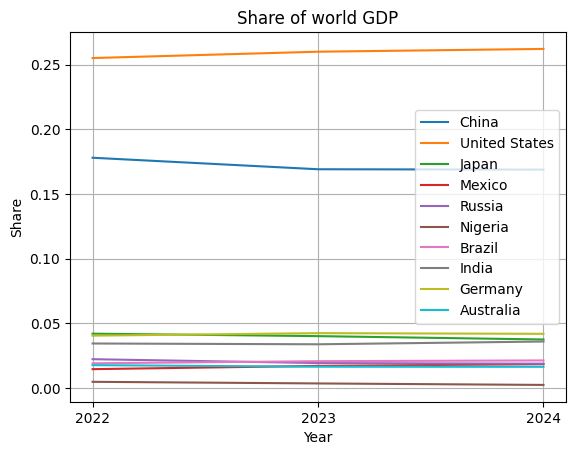

In [49]:
for index, row in df_top10.iterrows():
    plt.plot(row[['UN_Share', 'WB_Share', 'IMF_Share']], label=row['Coutry'])

plt.title('Share of world GDP')
plt.xlabel('Year')
plt.xticks(ticks=[0, 1, 2], labels=['2022', '2023', '2024'])
plt.ylabel('Share')
plt.legend()
plt.grid()
plt.show()


Суттєві зміни помітні тільки для США та Китаю. У інших країн зміни досить малі, але можна побачити динаміку на ріст для Мексики та Індії.